In [2]:
from PIL import Image
import numpy as np
import scipy.io.wavfile as wav
import pyofdm.codec
import pyofdm.nyquistmodem
import matplotlib.pyplot as plt

In [3]:
# Number of total frequency samples
totalFreqSamples = 2048

# Number of useful data carriers / frequency samples
sym_slots = 1512

# QAM Order
QAMorder = 2

# Total number of bytes per OFDM symbol
nbytes = sym_slots * QAMorder // 8

# Distance of the evenly spaced pilots
distanceOfPilots = 12
pilotlist = pyofdm.codec.setpilotindex(nbytes, QAMorder, distanceOfPilots)

ofdm = pyofdm.codec.OFDM(pilotAmplitude=16/9, 
                         nData=nbytes, 
                         pilotIndices=pilotlist,
                         mQAM=QAMorder,
                         nFreqSamples=totalFreqSamples)

In [4]:
samp_rate, base_signal = wav.read("ofdm44100.wav")

# append some extra zeros to the base_signal
extra_pad_length = 60
base_signal = np.pad(base_signal, (0, extra_pad_length), "constant")

In [5]:
complex_signal = pyofdm.nyquistmodem.demod(base_signal)

In [6]:
# find the start of the OFDM symbol
searchRangeForPilotPeak = 8
cc, sumofimag, offset = ofdm.findSymbolStartIndex(complex_signal, searchrangefine=searchRangeForPilotPeak)
print("Symbol start sample index =", offset)

Symbol start sample index = 2585


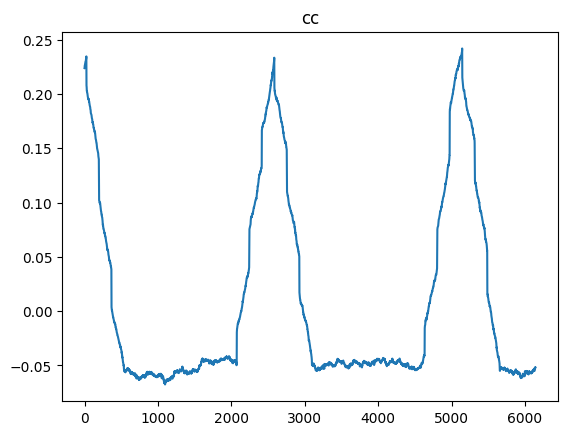

In [7]:
plt.plot(cc)
plt.title("cc")
plt.show()

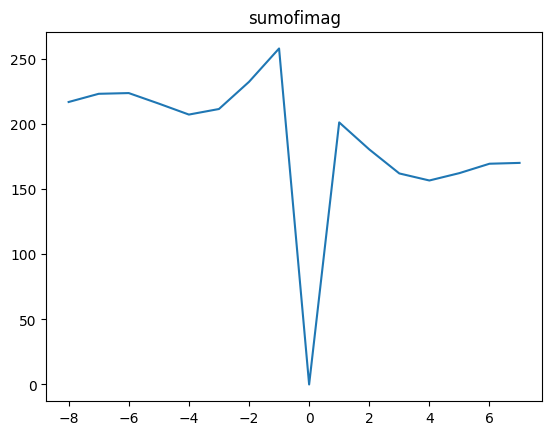

In [8]:
search_range = np.arange(-searchRangeForPilotPeak, searchRangeForPilotPeak)
plt.plot(search_range, sumofimag)
plt.title("sumofimag")
plt.show()

In [9]:
Nsig_sym = 159

In [10]:
ofdm.initDecode(complex_signal, 25)
rx_byte = np.uint8([ofdm.decode()[0] for i in range(Nsig_sym)]).ravel()
rx_byte = 255 - rx_byte

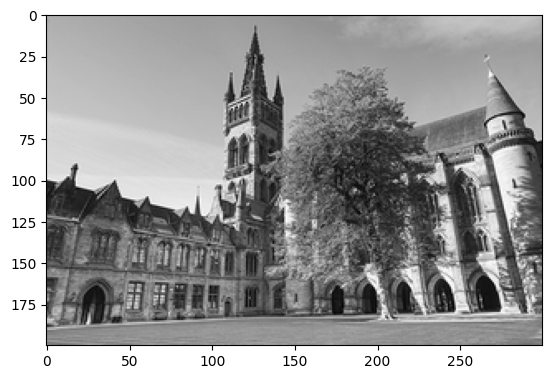

In [12]:
rx_byte = rx_byte[:60000].reshape(200, 300)
receive_img = Image.fromarray(rx_byte)
plt.imshow(receive_img, plt.cm.gray)

In [11]:
# calculate bit error ratio
origin_img = Image.open("DC4_300x200.pgm")
origin_img = np.array(origin_img)
ber = np.sum(origin_img != receive_img) / origin_img.size
print("Bit error ratio = ", ber)

Bit error ratio =  0.0
